# Capstone Two

# Idea


1. Out of all the variables which features most strongly attributed to a happier country in 2020
2. Adding Covid data is there any correlation with happiness? 
3. take happiest 3 countries and least happy 3 countires, is there any correlation:money spent on education (% of GDP
4. Are there fractal elements in data? 
5. Models to use: Supervised,(simple/multiple) linear, logistic regression analysis,  Modeling, Regression, Predictive modeling, Random Forest

Keep in mind the least happy nations may not have all the necessary information due to their standing in the world and what leads them to be so low in the ranking.I would like to gather this infomration for all countries BUT for now is there a great difference between this informatoin in the most happiest and least and is there a correlation of some sort. 


In [85]:
#Data loading

import pandas as pd
import matplotlib as plt
import seaborn as sns
import os

import pandas as pd
import os
import pickle
import numpy as np 
import json
import statistics

#pip! install plotly
#pip! install cufflinks
#pip list
#pip list | grep plotly

#pip install plotly
!pip install bubbly

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

data_2020= pd.read_csv('2020.csv')


#df=pd.read_csv('cleaned_data.csv', parse_dates=['date_time'])sns.set(style='ticks')


In [22]:
data_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


# Correlation and Feature Importance

In [12]:
#data correlation;
data_2020.corr().T

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000e+00,-4.464433e-01,9.995772e-01,9.996007e-01,7.753744e-01,7.650008e-01,7.703163e-01,5.905968e-01,6.904313e-02,-4.183051e-01,2.761262e-15,7.753744e-01,7.650008e-01,7.703163e-01,5.905968e-01,6.904313e-02,4.183051e-01,4.802789e-01
Standard error of ladder score,-4.464433e-01,1.000000e+00,-4.202380e-01,-4.715483e-01,-5.789263e-01,-5.158812e-01,-5.864704e-01,-2.924977e-01,7.274192e-02,3.035997e-01,-2.028613e-15,-5.789263e-01,-5.158812e-01,-5.864704e-01,-2.924977e-01,7.274192e-02,-3.035997e-01,1.496833e-01
upperwhisker,9.995772e-01,-4.202380e-01,1.000000e+00,9.983566e-01,7.674834e-01,7.590122e-01,7.621089e-01,5.894104e-01,7.237907e-02,-4.143315e-01,-1.897447e-15,7.674834e-01,7.590122e-01,7.621089e-01,5.894104e-01,7.237908e-02,4.143315e-01,4.919065e-01
lowerwhisker,9.996007e-01,-4.715483e-01,9.983566e-01,1.000000e+00,7.824148e-01,7.702008e-01,7.776683e-01,5.912713e-01,6.574526e-02,-4.218278e-01,2.738435e-15,7.824148e-01,7.702008e-01,7.776683e-01,5.912713e-01,6.574526e-02,4.218278e-01,4.685900e-01
Logged GDP per capita,7.753744e-01,-5.789263e-01,7.674834e-01,7.824148e-01,1.000000e+00,7.818136e-01,8.484686e-01,4.190186e-01,-1.183994e-01,-3.347291e-01,1.434726e-15,1.000000e+00,7.818136e-01,8.484686e-01,4.190187e-01,-1.183994e-01,3.347291e-01,-6.206306e-02
Social support,7.650008e-01,-5.158812e-01,7.590122e-01,7.702008e-01,7.818136e-01,1.000000e+00,7.427441e-01,4.788632e-01,-5.678035e-02,-2.105296e-01,2.757347e-15,7.818136e-01,1.000000e+00,7.427441e-01,4.788632e-01,-5.678036e-02,2.105296e-01,-2.800699e-03
Healthy life expectancy,7.703163e-01,-5.864704e-01,7.621089e-01,7.776683e-01,8.484686e-01,7.427441e-01,1.000000e+00,4.488462e-01,-7.185211e-02,-3.538412e-01,-5.890844e-15,8.484686e-01,7.427441e-01,1.000000e+00,4.488462e-01,-7.185211e-02,3.538412e-01,-3.994777e-02
Freedom to make life choices,5.905968e-01,-2.924977e-01,5.894104e-01,5.912713e-01,4.190186e-01,4.788632e-01,4.488462e-01,1.000000e+00,2.537211e-01,-4.201445e-01,-9.230068e-16,4.190186e-01,4.788632e-01,4.488462e-01,1.000000e+00,2.537211e-01,4.201445e-01,6.257126e-02
Generosity,6.904313e-02,7.274192e-02,7.237907e-02,6.574526e-02,-1.183994e-01,-5.678035e-02,-7.185211e-02,2.537211e-01,1.000000e+00,-2.784802e-01,-2.158034e-17,-1.183994e-01,-5.678035e-02,-7.185210e-02,2.537211e-01,1.000000e+00,2.784802e-01,-2.178495e-02
Perceptions of corruption,-4.183051e-01,3.035997e-01,-4.143315e-01,-4.218278e-01,-3.347291e-01,-2.105296e-01,-3.538412e-01,-4.201445e-01,-2.784802e-01,1.000000e+00,6.095487e-17,-3.347291e-01,-2.105296e-01,-3.538412e-01,-4.201445e-01,-2.784802e-01,-1.000000e+00,1.785091e-02


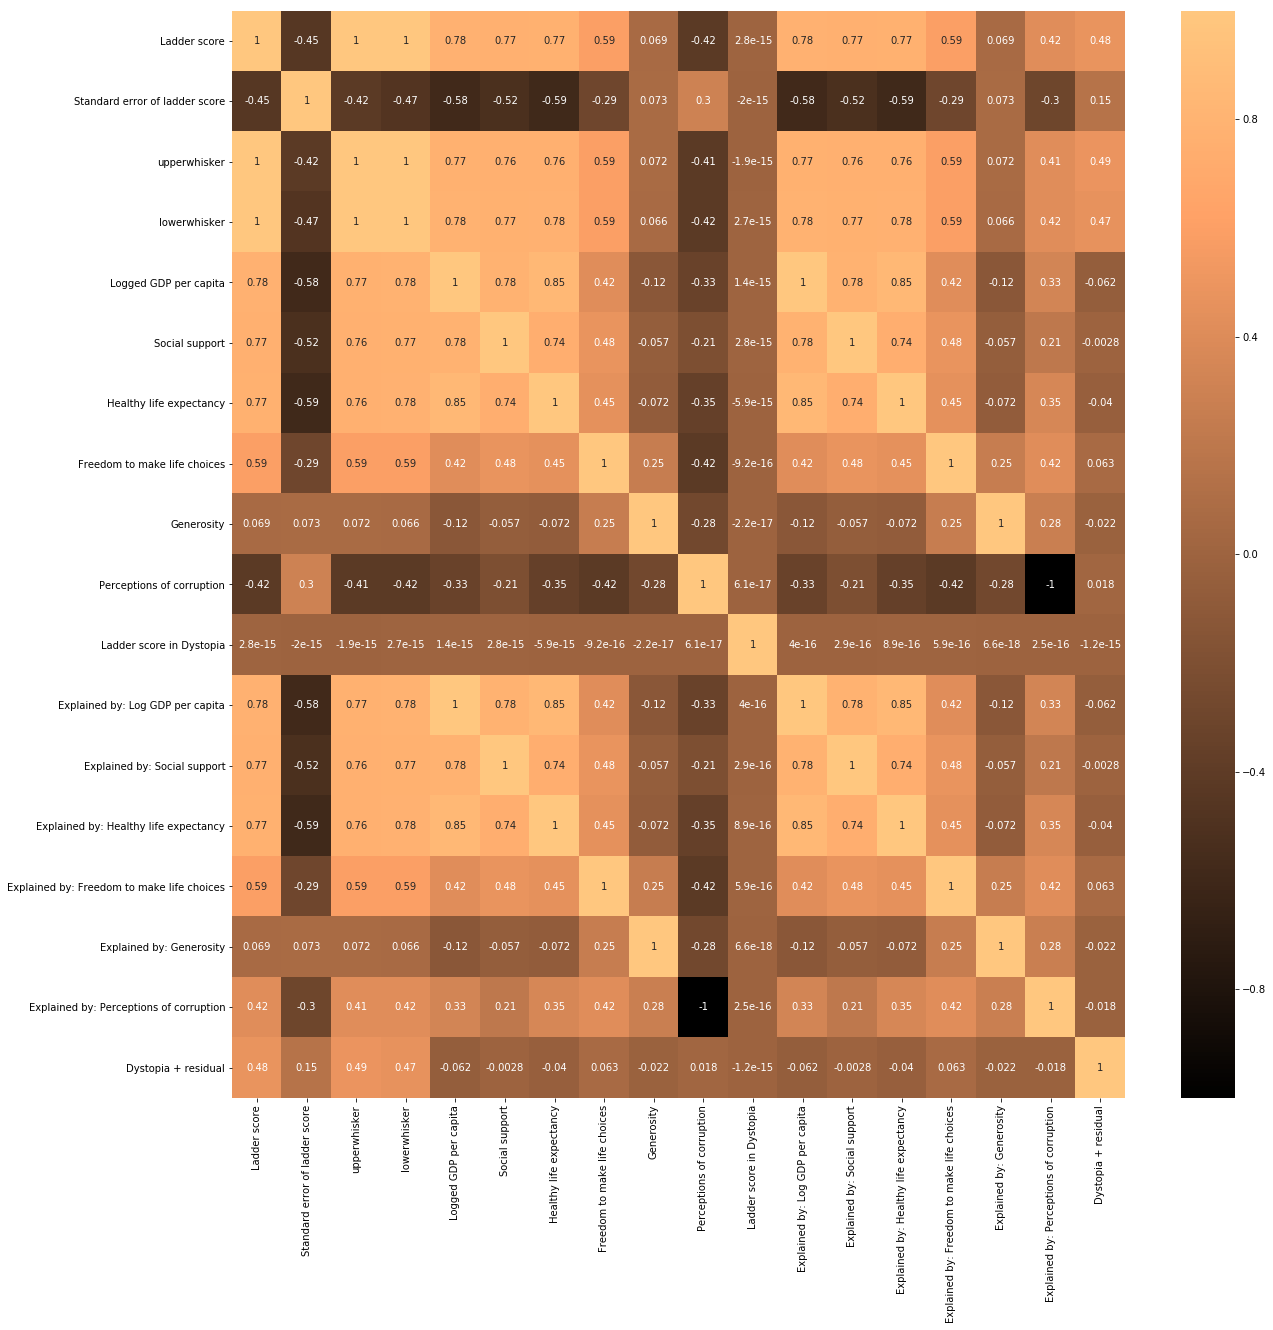

In [101]:
#visualize correlation of 2020 happiness data

plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(data_2020.corr(), cmap = 'copper', annot = True)

In [ ]:
#Summary of findings, highest positive correlation with ladder score:

1. Logged GDP per capita .78
2. social support, healthy line expectancy .77

In [11]:
#Inferential Statistics 
#Do any particular results in your data strike you as abnormal?
#summary stats table transposed for df
data_2020.describe().T 

,count,mean,std,min,25%,50%,75%,max
Ladder score,153.0,5.473240,1.112270e+00,2.566900,4.724100,5.515000,6.228500,7.808700
Standard error of ladder score,153.0,0.053538,1.818302e-02,0.025902,0.040698,0.050606,0.060677,0.120590
upperwhisker,153.0,5.578175,1.096823e+00,2.628270,4.826248,5.607728,6.363886,7.869766
lowerwhisker,153.0,5.368304,1.128631e+00,2.505530,4.603149,5.430644,6.138881,7.747634
Logged GDP per capita,153.0,9.295706,1.201588e+00,6.492642,8.350645,9.456313,10.265124,11.450681
Social support,153.0,0.808721,1.214533e-01,0.319460,0.737217,0.829204,0.906747,0.974670
Healthy life expectancy,153.0,64.445529,7.057848e+00,45.200001,58.961712,66.305145,69.289192,76.804581
Freedom to make life choices,153.0,0.783360,1.177863e-01,0.396573,0.714839,0.799805,0.877709,0.974998
Generosity,153.0,-0.014568,1.518088e-01,-0.300907,-0.127015,-0.033665,0.085429,0.560664
Perceptions of corruption,153.0,0.733120,1.751724e-01,0.109784,0.683019,0.783122,0.849151,0.935585


In [13]:
#Variance
(statistics.variance(data_2020['Ladder score']))

1.237144939253873

# Visualizing Data

In [ ]:
#which features are highest correlated with Ladder score across the world? 

1. Logged GDP per capita .78
2. social support, healthy line expectancy .77

In [48]:
#pie chart of all regions

d2020 = data_2020['Regional indicator'].value_counts()

label_d2020 = d2020.index
size_d2020 = d2020.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']

trace = go.Pie(
         labels = label_d2020, values = size_d2020, marker = dict(colors = colors), name = 'data_2020', hole = 0.3)

data = [trace]

layout1 = go.Layout(
           title = 'Regions')

fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

In [91]:
#sunburst chart of region, country, ladder score, and gdp

import plotly.express as px

fig = px.sunburst(data_2020, path=['Regional indicator', 'Country name'], values='Ladder score',
                  color='Ladder score', hover_data=['Logged GDP per capita'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(data_2020['Ladder score'], weights=data_2020['Ladder score']))
fig.update_layout(hovermode="x unified")
fig.show()

Summary: sub- saharan AFrica has on average the lowest ladder score. As mentioned earlier there is a high correlation between GDP number and ladder score. If you look at the GDP the countriest with the lowest gdp are the most unhappy. Afghanisan is the most obvious example of this. 

In [144]:
#linegraph 
# Creating trace1
trace1 = go.Scatter(x = data_2020['Country name'],
                    y = data_2020['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Logged GDP per capita",
                    marker = dict(color = 'red'),
                    text= data_2020)

# Creating trace2
trace2 = go.Scatter(x = data_2020['Country name'],
                    y = data_2020['Social support'],
                    mode = "lines+markers",
                    name = "Social support",
                    marker = dict(color = 'blue'),
                    text= data_2020)

# Creating trace3
trace3 = go.Scatter(x = data_2020['Country name'],
                    y = data_2020['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Healthy life expectancy",
                    marker = dict(color = 'green'),
                    text= data_2020)


data = [trace1, trace2, trace3]
layout = dict(title = 'Logged GDP per Capita - Social Support - Healthy Life Expectancy in 2020 for First 50 Countries',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

Summary: Generally these three features overlap for most countries. Countries like Slovenia, Finland, Norway, and Australia seem to be an outlier in this regard. 

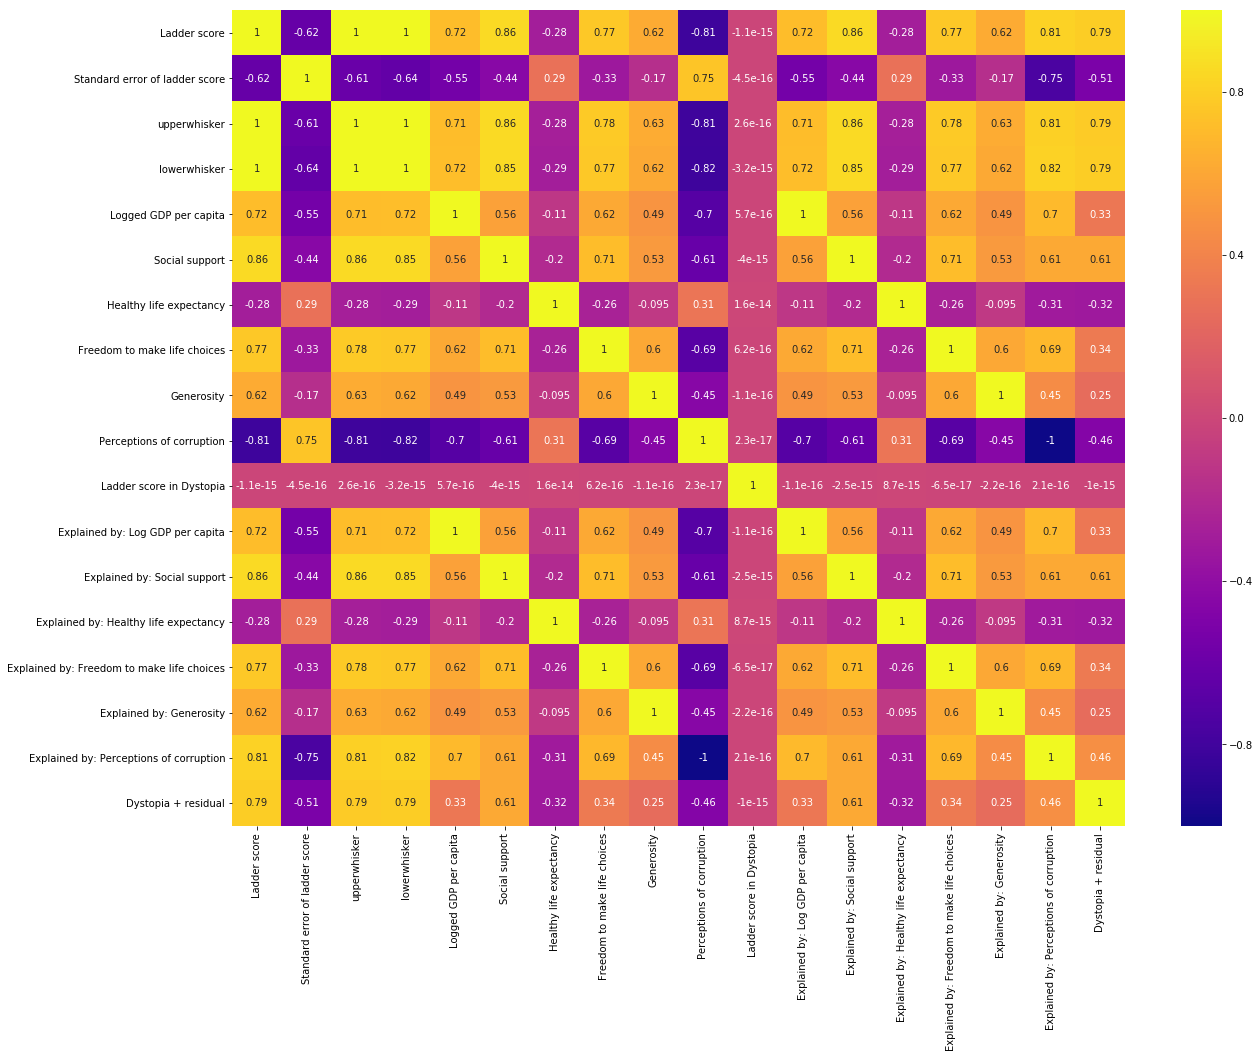

In [104]:
#which makes each region happy? look at features that were highest correlated in each region 
#Western Europe 


plt.rcParams['figure.figsize'] = (20, 15)

d = data_2020.loc[lambda data_2020: data_2020['Regional indicator'] == 'Western Europe']
sns.heatmap(d.corr(), cmap = 'plasma', annot = True)

Summary: For Western Europe the social support, freedom to make life choices have a high correlation with happiness or "ladder score." Perception of corruption has the highest negative correlation with "ladder score."

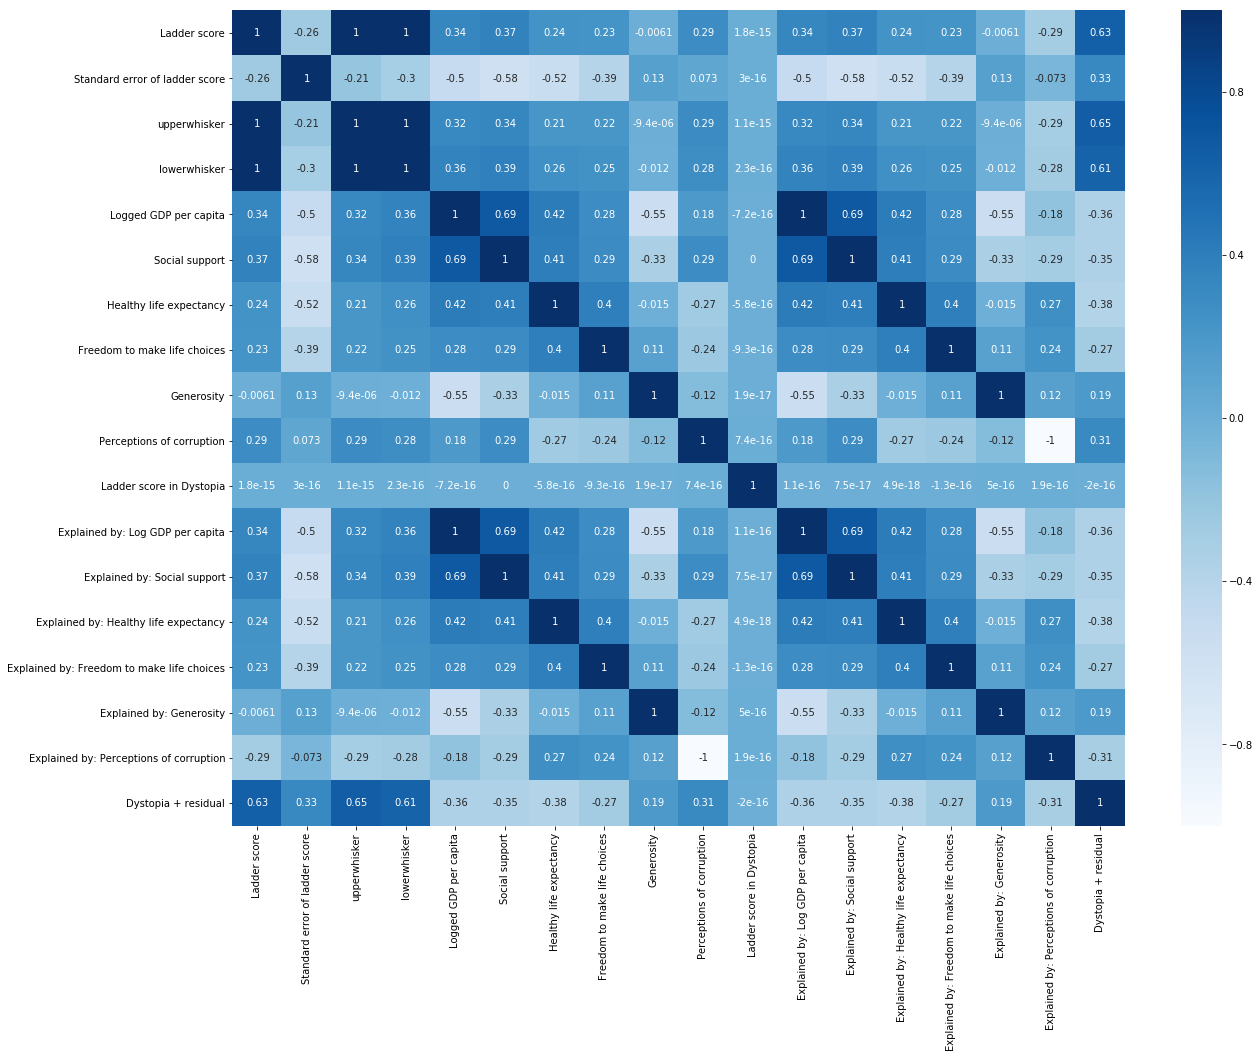

In [107]:
#which makes each region happy? look at features that were highest correlated in each region 
#Sub-Saharan Africa 


plt.rcParams['figure.figsize'] = (20, 15)

d = data_2020.loc[lambda data_2020: data_2020['Regional indicator'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(), cmap = 'Blues', annot = True)

Summary: For Sub-Saharan Africa social support, social support, GDP, perception of corruption,  have a high correlation with happiness or "ladder score," but not as strongly as western europe. Perception of corruption has the highest negative correlation with "ladder score."

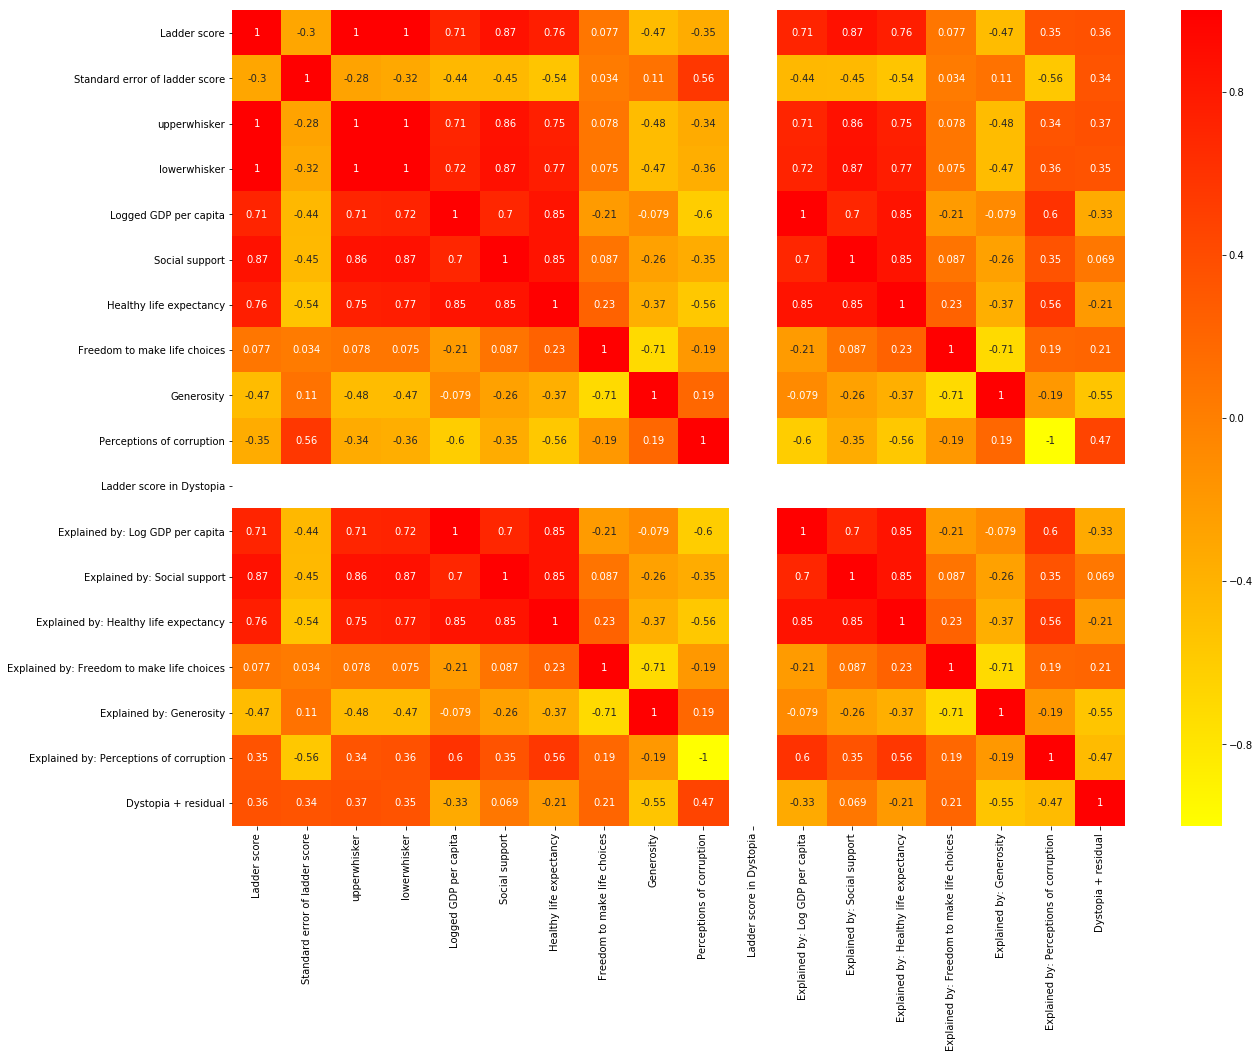

In [110]:
#which makes each region happy? look at features that were highest correlated in each region 
#Southeast Asia 


plt.rcParams['figure.figsize'] = (20, 15)

d = data_2020.loc[lambda data_2020: data_2020['Regional indicator'] == 'Southeast Asia']
sns.heatmap(d.corr(), cmap = 'autumn_r', annot = True)

Summary: For SouthEast Asia social support, social support, healthy life expectation, have a high correlation with happiness or "ladder score." Perception of corruption has the highest negative correlation with "ladder score."

In [ ]:
TBC......

# Most and Least Generous Country

In [60]:
#which country is most generous

data_2020[['Country name', 'Generosity',]].sort_values(by = 'Generosity', ascending = False).head(10)


,Country name,Generosity
132,Myanmar,0.560664
83,Indonesia,0.519587
141,Haiti,0.400535
112,Gambia,0.343199
120,Kenya,0.294682
53,Thailand,0.268685
12,United Kingdom,0.263732
37,Uzbekistan,0.248427
3,Iceland,0.246944
21,Malta,0.214966


In [64]:
#which country is the least generous

data_2020[['Country name', 'Generosity',]].sort_values(by = 'Generosity', ascending = True)


,Country name,Generosity
76,Greece,-0.300907
146,Botswana,-0.250394
61,Japan,-0.246910
96,Morocco,-0.240377
88,Azerbaijan,-0.240255
...,...,...
120,Kenya,0.294682
112,Gambia,0.343199
141,Haiti,0.400535
83,Indonesia,0.519587


# Most and Least Generous Region

In [65]:
#which region is most generous

data_2020[['Regional indicator', 'Generosity',]].sort_values(by = 'Generosity', ascending = False).head(10)

,Regional indicator,Generosity
132,Southeast Asia,0.560664
83,Southeast Asia,0.519587
141,Latin America and Caribbean,0.400535
112,Sub-Saharan Africa,0.343199
120,Sub-Saharan Africa,0.294682
53,Southeast Asia,0.268685
12,Western Europe,0.263732
37,Commonwealth of Independent States,0.248427
3,Western Europe,0.246944
21,Western Europe,0.214966


In [67]:
#which region is least generous

data_2020[['Regional indicator', 'Generosity',]].sort_values(by = 'Generosity', ascending = True)

,Regional indicator,Generosity
76,Western Europe,-0.300907
146,Sub-Saharan Africa,-0.250394
61,East Asia,-0.246910
96,Middle East and North Africa,-0.240377
88,Commonwealth of Independent States,-0.240255
...,...,...
120,Sub-Saharan Africa,0.294682
112,Sub-Saharan Africa,0.343199
141,Latin America and Caribbean,0.400535
83,Southeast Asia,0.519587


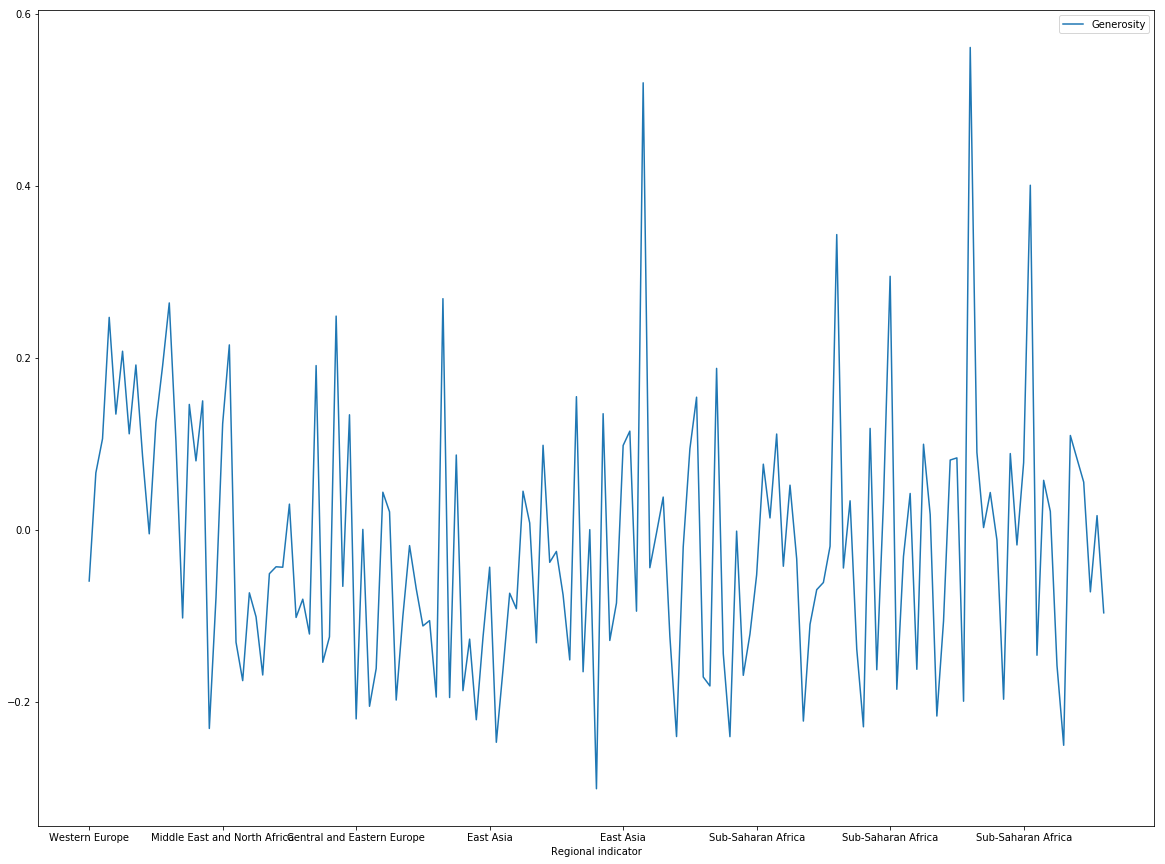

In [119]:
data_2020.plot(x="Regional indicator", y=["Generosity"])

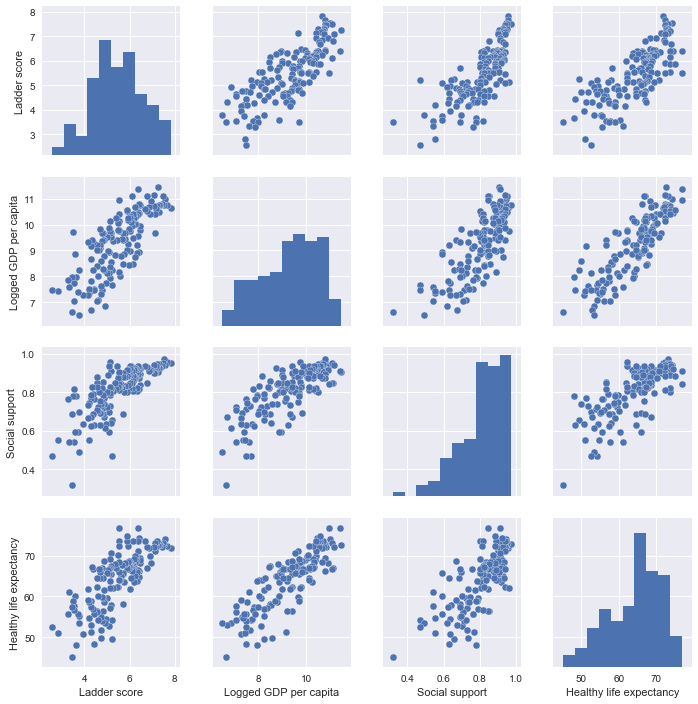

In [139]:
# Scatterplots to understand relationship of ladder Score with the selected 3 features 
sns.set()
cols = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']
sns.pairplot(data_2020[cols])#, size = 2.5)

C:\dev\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



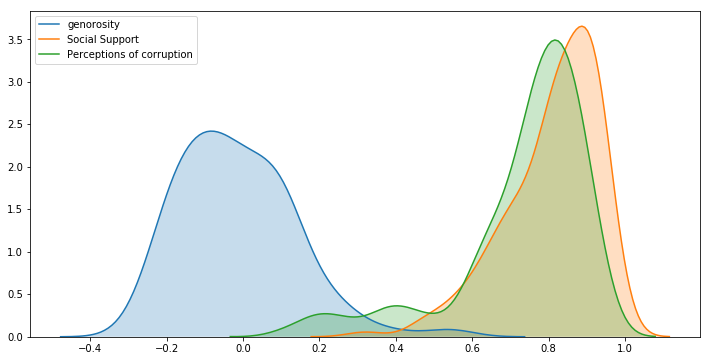

In [134]:
#lineplot 
#add headings
plt.figure(figsize = (12,6))

sns.kdeplot(data=data_2020['Generosity'], label="genorosity", shade=True)
sns.kdeplot(data=data_2020['Social support'], label="Social Support", shade=True)
sns.kdeplot(data=data_2020['Perceptions of corruption'], label="Perceptions of corruption", shade=True)



# Questions To Answer
Are there variables that are particularly significant in terms of explaining the answer to your project question?

Yes, GDP, family, and Life expectancy have a positive correlation with happiness score. The higher these variables the higher the happiness score. I"m also trying to see if theres sometype of correlation between spending in education and in happiness score or life expectancy.

Are there significant differences between subgroups in your data that may be relevant to your project aim?

GDP and trust in government varies widely.

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

What are the most appropriate tests to use to analyze these relationships? Correlation matrix have thus far been the most helpful to vizualize how all the variables interact.

# Including Other Data

In [ ]:
data_2020= pd.read_csv('2020.csv')

data_2019= pd.read_csv('2019.csv')

data_2018= pd.read_csv('2018.csv')

data_2017= pd.read_csv('2017.csv')

data_2016= pd.read_csv('2016.csv')

data_2015= pd.read_csv('2015.csv')

#add the column "Year" to all datasets

data_2015['Year'] = 2015 
data_2016['Year'] = 2016 
data_2017['Year'] = 2017 
data_2018['Year'] = 2018    
data_2019['Year'] = 2019 
data_2020['Year'] = 2020 

#change columns, Country, Region, Happiness Rank, Happiness Score, GDP, Life Expectancy to be the same in all datasets
#https://www.listendata.com/2020/09/How-to-rename-columns-in-Pandas.html
#call rename () method 
##df.rename(columns={'year':'years', 'month':'months' }, inplace = True)

data_2020.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country name':'Country','Regional indicator':'Region','Ladder score':'Happiness Score','Logged GDP per capita':'GDP', 'Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2019.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country or region':'Country','Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'GDP','Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2018.rename(columns={'Social support':'Family','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust','Country or region':'Country','Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'GDP','Healthy life expectancy':'Life Expectancy'}, inplace = True)
data_2017.rename(columns={'Trust..Government.Corruption.':'Trust','Country':'Country','Region':'Region','Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'GDP','Health..Life.Expectancy.':'Life Expectancy'}, inplace = True)
data_2016.rename(columns={'Trust (Government Corruption)':'Trust','Country':'Country','Region':'Region','Happiness Rank':'Happiness Rank','Happiness score':'Happiness Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life Expectancy'}, inplace = True)
data_2015.rename(columns={'Trust (Government Corruption)':'Trust','Country':'Country','Region':'Region','Happiness Rank':'Happiness Rank','Happiness score':'Happiness Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life Expectancy'}, inplace = True)
#2020 doesnt have a "happiness rank column"
#2018 doesnt have a region column same as country

#concatenate data
#resources- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 
    
frames = [data_2020, data_2019, data_2018, data_2017, data_2016, data_2015]
all_happiness_data = pd.concat(frames)

# Edu Data 

In [ ]:
#Finland
#make a dataframe

fin = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 7.08, 6.90, 6.3]}

fin_edu = pd.DataFrame(data=fin)
    
print(fin_edu)    

In [ ]:
#Denmark
#make a dataframe

den = {'Year': [2014,2016, 2017], '% of GDP Spent On Edu': [ 7.63, np.nan, 7.82]}

den_edu = pd.DataFrame(data=den)
    
print(den_edu)    

In [ ]:
#Norway
#make a dataframe

nor = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 7.55, 7.98, 7.91]}

nor_edu = pd.DataFrame(data=nor)
    
print(nor_edu)  

In [ ]:
#Afghanistan 
#make a dataframe

af = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 3.26, 4.23, 4.06]}

af_edu = pd.DataFrame(data=af)
    
print(af_edu)   

#South Sudan
#make a dataframe

ss = {'Year': [2015,2016, 2017], '% of GDP Spent On Edu': [ 1.36 , 1.50, 0.98]}

ss_edu = pd.DataFrame(data=ss)
    
print(ss_edu)  

#Zimbabwe
#make a dataframe

zim = {'Year': [2014,2016, 2017], '% of GDP Spent On Edu': [ 6.14 , np.nan, 5.82]}

zim_edu = pd.DataFrame(data=zim)
    
print(zim_edu) 

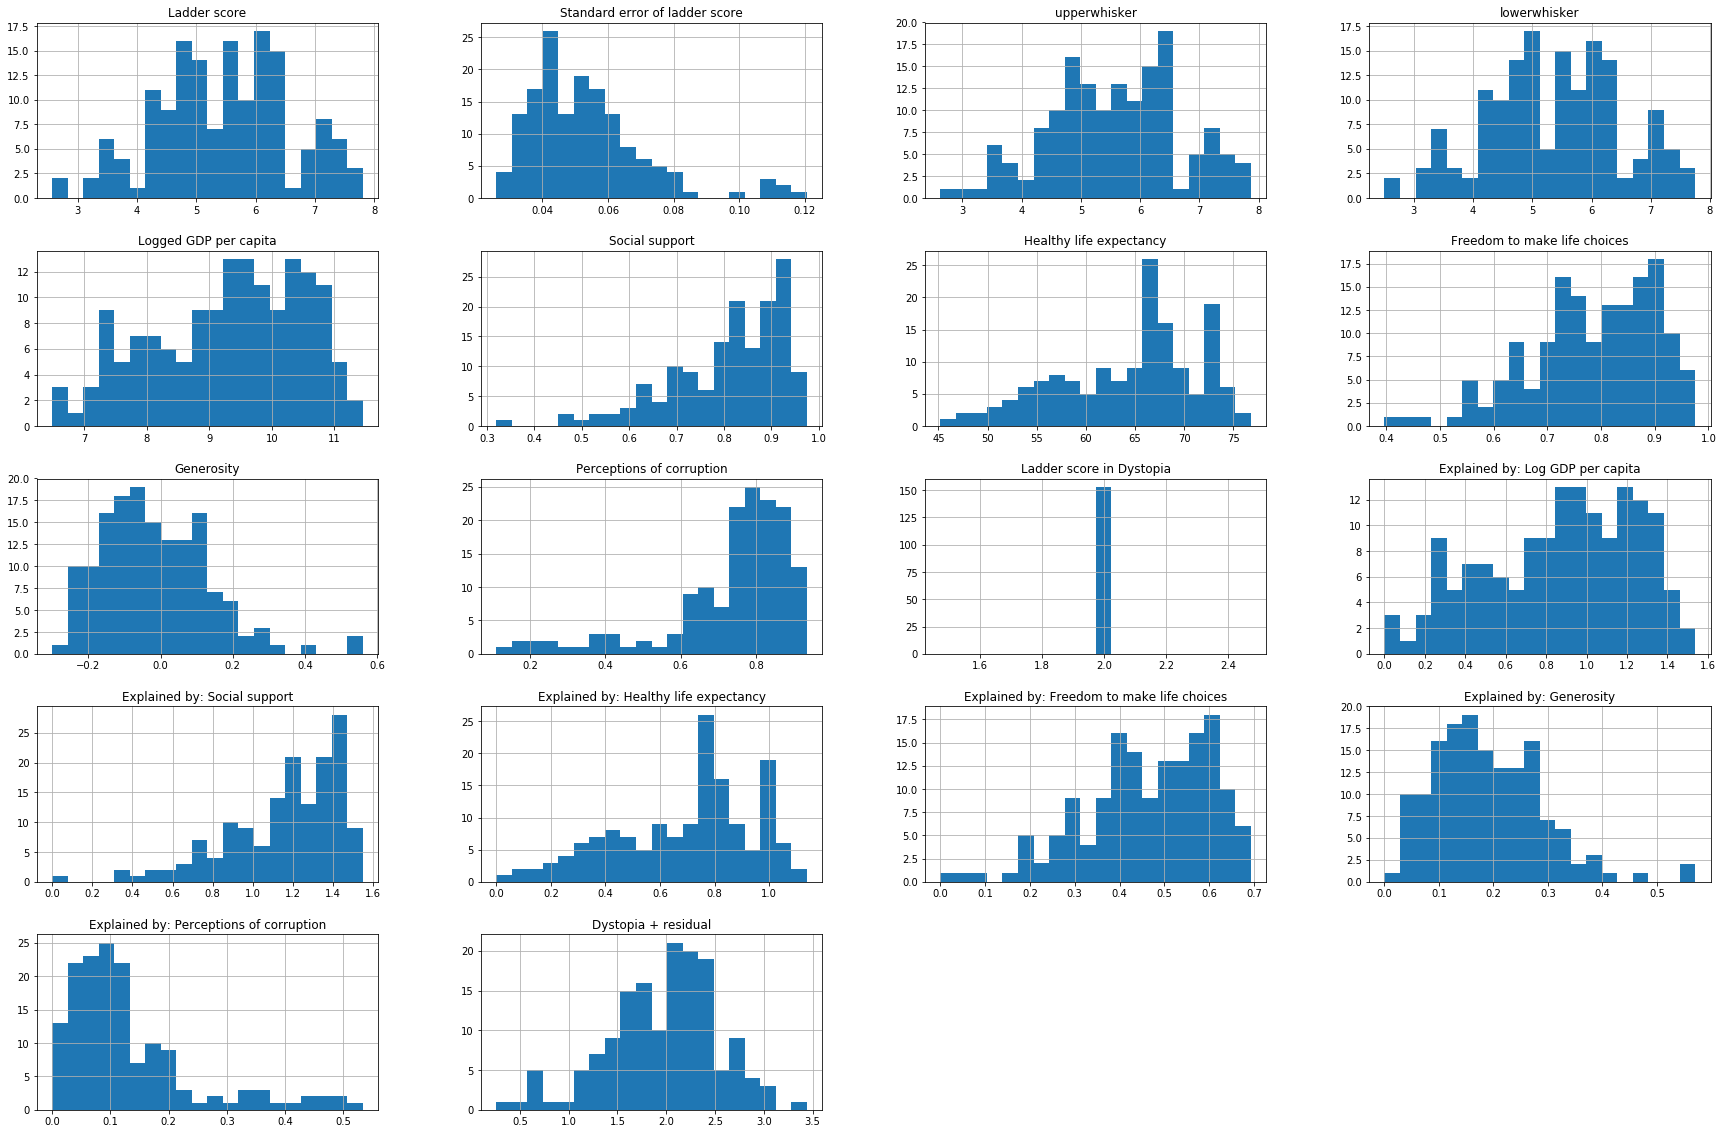

In [98]:
#showcase subplots of each feature over the past 5 years
#histograms for each variable in df

hist = data_2020.hist(bins=20,figsize =(30,20))

In [70]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math


data = [
    {
        'y': df['Trust (Government Corruption)'],
        'x': df.Freedom,
        'mode': 'markers',
        'marker': {
            'color': df['Health (Life Expectancy)'],
            'size': df['Happiness Score'],
            'showscale': True
        },
        "text" :  df.Country    
    }
]
layout = go.Layout(barmode='overlay', hovermode="x",
                   title='Bubble Chart: x = Freedom, y = Trust, size = Happiness Score, Color = Health, year = 2016',
                   xaxis=dict(title='Freedom'),
                   yaxis=dict(title='Trust'),
                  
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [ ]:
#has education spending have any correlation with the happiest and least happiest countries? all show on one graph? 
#change countries 


import matplotlib.pyplot as plt

plt.plot(xAxis,yAxis)
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()



# Covid Data

In [ ]:
#has covid numbers of deaths/ numbers of covid affected happiness in countries?
#graph all countries in regions at once

import json
  
# Opening JSON file
covid = open('json',)
  
# returns JSON object as 
# a dictionary
covid_data = json.load(covid)
  
# Iterating through the json
# list
#for i in data['emp_details']:
    #print(i)
  
#Closing file
covid.close()

covid_data.head()

# Checking Fractual Nature of Data

In [ ]:
#is the data fractua in nature? 